# Credit_Amount Case Study
Exploratory Data Analysis

### Introduction
> We have loan applications data for about 307k applications. The goal of this case is to perform Risk Analytics with the help of data wrangling and visualisation libraries of Python. The end goal is to derive important insights for the bank to identify the characteristics for bad loan applications. ( Bad loans are loans which are delayed/not paid.)

### Objectives
* Identify what are some common characteristics of bad loan applications
* Identify if there are any patterns related to applicants with loan difficulties
* Identify the driving factors or strong indicators of a bad loan application

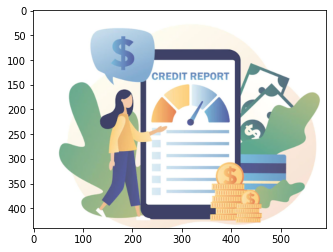

In [282]:
img= mpimg.imread("cover-image.PNG")
plt.imshow(img)
plt.show()

## Project Files

## data_dictionary
> https://drive.google.com/file/d/1Tsu3qdkakVsLCtzpNzBU5ZJt8aqdMbFt/view?usp=share_link

## credit_data 
> https://drive.google.com/file/d/1OTM7_A5YkPKjBiniCfzBIq2YVviFxjuc/view?usp=sharing


## Libraries

In [283]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import warnings
warnings.filterwarnings('ignore')

In [284]:
pd.options.display.max_rows = 4000
pd.options.display.max_columns = 1000

## Read Files

In [285]:
credit_data= pd.read_csv("application_data.csv")
credit_data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

# 1. Data Wrangling

In [286]:
credit_data.head(20)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0000,0.000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0000,0.000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

By observing the data we find that it is a mix of Qualitative and Quantitative variable.

## 1.1 Inspecting Data

In [287]:
# checking the shape of the data

print(f"Number of rows are {credit_data.shape[0]}")
print(f"Number of columns are {credit_data.shape[1]}")

Number of rows are 307511
Number of columns are 122


In [288]:
# checking 5 point summary

credit_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

we can see there are some invalid **-ve** values in the column (DAYS_BIRTH)

In [289]:
# List all Null values

credit_data.isnull().sum().sort_values(ascending=False)

COMMONAREA_MEDI                 214865
COMMONAREA_AVG                  214865
COMMONAREA_MODE                 214865
NONLIVINGAPARTMENTS_MODE        213514
NONLIVINGAPARTMENTS_AVG         213514
NONLIVINGAPARTMENTS_MEDI        213514
FONDKAPREMONT_MODE              210295
LIVINGAPARTMENTS_MODE           210199
LIVINGAPARTMENTS_AVG            210199
LIVINGAPARTMENTS_MEDI           210199
FLOORSMIN_AVG                   208642
FLOORSMIN_MODE                  208642
FLOORSMIN_MEDI                  208642
YEARS_BUILD_MEDI                204488
YEARS_BUILD_MODE                204488
YEARS_BUILD_AVG                 204488
OWN_CAR_AGE                     202929
LANDAREA_MEDI                   182590
LANDAREA_MODE                   182590
LANDAREA_AVG                    182590
BASEMENTAREA_MEDI               179943
BASEMENTAREA_AVG                179943
BASEMENTAREA_MODE               179943
EXT_SOURCE_1                    173378
NONLIVINGAREA_MODE              169682
NONLIVINGAREA_AVG        

In [290]:
# percentage of Null values

null_per= credit_data.isnull().sum().sort_values(ascending=False)/len(credit_data)*100
null_per

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

we will not consider the columns having **Null values >45%**

In [291]:
# filter top 60 columns with max null values

null_per.head(60)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

## 1.2 Data Cleaning

#### Identifying and removing columns having Null values> 45%

In [292]:
null_col = credit_data.isnull().sum().sort_values(ascending=False)
len(null_col)

122

In [293]:
null_col= null_col[null_col.values>(0.45*len(credit_data))]

In [294]:
len(null_col)

49

So there are total **49** Null Columns having **Null values >45%**

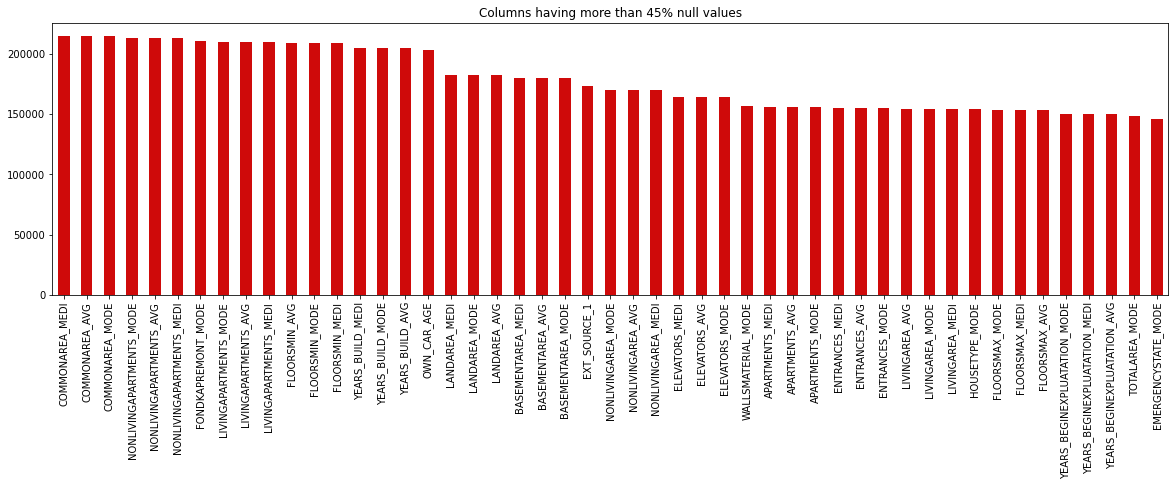

In [295]:
plt.figure(figsize=(20,5))
null_col.plot(kind='bar', color="#CF0A0A")

plt.title("Columns having more than 45% null values")
plt.show()

#### removing of columns with null values >45%

In [296]:
# function to remove null values

def remove_null_cols(data):
    perc=0.45                                                             
    df = data.copy()                                                      
    shape_before = df.shape                                              
    remove_cols = (df.isnull().sum()/len(df))                             
    remove_cols = list(remove_cols[remove_cols.values>=perc].index)       
    df.drop(labels = remove_cols,axis =1,inplace=True)                    
    print("Number of Columns dropped\t: ",len(remove_cols))    
    print("\nOld dataset rows,columns",shape_before,"\nNew dataset rows,columns",df.shape)
    return df

In [297]:
# after removal of all null columns now we have credit_data1 for further analysis

credit_data1 = remove_null_cols(credit_data)

Number of Columns dropped	:  49

Old dataset rows,columns (307511, 122) 
New dataset rows,columns (307511, 73)


In [298]:
# checking percent of null values in new dataset

null_per1= credit_data1.isnull().sum().sort_values(ascending=False)/len(credit_data1)*100
null_per1.head(30)

OCCUPATION_TYPE               31.345545
EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
NAME_TYPE_SUITE                0.420148
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
EXT_SOURCE_2                   0.214626
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
FLAG_DOCUMENT_17               0.000000
FLAG_DOCUMENT_18               0.000000
FLAG_DOCUMENT_21               0.000000
FLAG_DOCUMENT_20               0.000000
FLAG_DOCUMENT_19               0.000000
FLAG_DOCUMENT_2                0.000000
FLAG_DOCUMENT_3                0.000000


now we can verified that our modified dataframe - "credit_data1" has no cols more than 31% null values.

## 1.3 Imputing Missing Values

Below listed columns showns the same significance as they represent number of queries made to Credit Beureau

#### AMT_REQ_CREDIT_BUREAU_YEAR
#### AMT_REQ_CREDIT_BUREAU_MON
#### AMT_REQ_CREDIT_BUREAU_WEEK
#### AMT_REQ_CREDIT_BUREAU_DAY
#### AMT_REQ_CREDIT_BUREAU_HOUR
#### AMT_REQ_CREDIT_BUREAU_QRT

In [299]:
impute_list= ["AMT_REQ_CREDIT_BUREAU_YEAR",
"AMT_REQ_CREDIT_BUREAU_MON",
"AMT_REQ_CREDIT_BUREAU_WEEK",
"AMT_REQ_CREDIT_BUREAU_DAY",
"AMT_REQ_CREDIT_BUREAU_HOUR",
"AMT_REQ_CREDIT_BUREAU_QRT"]

In [300]:
#loop is creted to get MODE at once

for i in impute_list:
    print(f" Mode of {i} is {credit_data1[i].mode()}")
    print("=="*40)

 Mode of AMT_REQ_CREDIT_BUREAU_YEAR is 0    0.0
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64
 Mode of AMT_REQ_CREDIT_BUREAU_MON is 0    0.0
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64
 Mode of AMT_REQ_CREDIT_BUREAU_WEEK is 0    0.0
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64
 Mode of AMT_REQ_CREDIT_BUREAU_DAY is 0    0.0
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64
 Mode of AMT_REQ_CREDIT_BUREAU_HOUR is 0    0.0
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64
 Mode of AMT_REQ_CREDIT_BUREAU_QRT is 0    0.0
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64


we found that the mode of above all columns is 0, Therefore we replace null values of all these columns with MODE

In [301]:
# verfying count of null before imputation

for i in impute_list:
    print(f"Number of null values in {i} is {credit_data1[i].isnull().sum()}")

Number of null values in AMT_REQ_CREDIT_BUREAU_YEAR is 41519
Number of null values in AMT_REQ_CREDIT_BUREAU_MON is 41519
Number of null values in AMT_REQ_CREDIT_BUREAU_WEEK is 41519
Number of null values in AMT_REQ_CREDIT_BUREAU_DAY is 41519
Number of null values in AMT_REQ_CREDIT_BUREAU_HOUR is 41519
Number of null values in AMT_REQ_CREDIT_BUREAU_QRT is 41519


In [302]:
# creating copy of credit_data1

credit_data2= credit_data1.copy()

In [303]:
#Imputing null values with 0's

for i in impute_list:
    credit_data2[i]= credit_data1[i].fillna(credit_data1[i].mode()[0])

In [304]:
# Verfying count of Nulls after imputation

for i in impute_list:
    print(f"Number of null values in {i} is {credit_data2[i].isnull().sum()}")

Number of null values in AMT_REQ_CREDIT_BUREAU_YEAR is 0
Number of null values in AMT_REQ_CREDIT_BUREAU_MON is 0
Number of null values in AMT_REQ_CREDIT_BUREAU_WEEK is 0
Number of null values in AMT_REQ_CREDIT_BUREAU_DAY is 0
Number of null values in AMT_REQ_CREDIT_BUREAU_HOUR is 0
Number of null values in AMT_REQ_CREDIT_BUREAU_QRT is 0


#### AMOUNT_ANNUITY

In [305]:
credit_data1['AMT_ANNUITY'].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

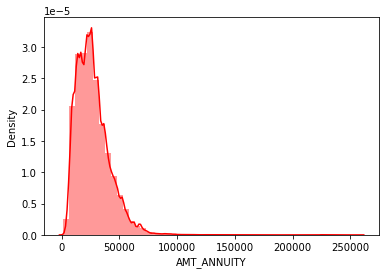

Skewness is 1.5797773638612507


In [306]:
sns.distplot(credit_data1['AMT_ANNUITY'], color="red")
plt.show()
print(f"Skewness is {credit_data1['AMT_ANNUITY'].skew()}")

as the data is highly skewed, therefore we use MEDIAN to replace NULL VALUES

In [307]:
credit_data1['AMT_ANNUITY'].median()

24903.0

In [308]:
# imputing AMT_ANNUITY Null values with median

credit_data2['AMT_ANNUITY']= credit_data1['AMT_ANNUITY'].fillna(credit_data1['AMT_ANNUITY'].median())

In [309]:
#Verfying count of Nulls after imputation

credit_data2['AMT_ANNUITY'].isnull().sum()

0

In [310]:
# checking null values

credit_data2.isnull().sum().sort_values(ascending=False)

OCCUPATION_TYPE                96391
EXT_SOURCE_3                   60965
NAME_TYPE_SUITE                 1292
OBS_30_CNT_SOCIAL_CIRCLE        1021
DEF_30_CNT_SOCIAL_CIRCLE        1021
OBS_60_CNT_SOCIAL_CIRCLE        1021
DEF_60_CNT_SOCIAL_CIRCLE        1021
EXT_SOURCE_2                     660
AMT_GOODS_PRICE                  278
CNT_FAM_MEMBERS                    2
DAYS_LAST_PHONE_CHANGE             1
FLAG_DOCUMENT_3                    0
FLAG_DOCUMENT_10                   0
FLAG_DOCUMENT_2                    0
FLAG_DOCUMENT_4                    0
FLAG_DOCUMENT_5                    0
FLAG_DOCUMENT_6                    0
FLAG_DOCUMENT_7                    0
FLAG_DOCUMENT_8                    0
FLAG_DOCUMENT_9                    0
SK_ID_CURR                         0
ORGANIZATION_TYPE                  0
FLAG_DOCUMENT_20                   0
AMT_REQ_CREDIT_BUREAU_QRT          0
AMT_REQ_CREDIT_BUREAU_MON          0
AMT_REQ_CREDIT_BUREAU_WEEK         0
AMT_REQ_CREDIT_BUREAU_DAY          0
A

#### AMT_GOODS_PRICE 

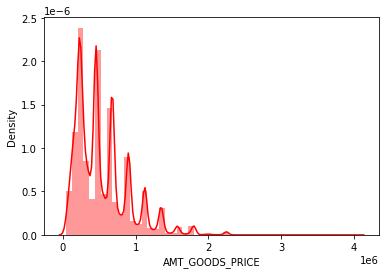

Skewness is 1.3490003414747445


In [311]:
sns.distplot(credit_data1['AMT_GOODS_PRICE'], color="red")
plt.show()

print(f"Skewness is {credit_data1['AMT_GOODS_PRICE'].skew()}")

As skewness of the data is high therefore we treat its **null values with mode**.

In [312]:
# Insert NULL VALUES of AMT_GOODS_PRICE with mode=0

credit_data2['AMT_GOODS_PRICE']= credit_data1['AMT_GOODS_PRICE'].fillna(0)

In [313]:
# Checking number of NULL VALUES

credit_data2['AMT_GOODS_PRICE'].isnull().sum()

0

## 1.4 Fixing Erroneous Data

As we alredy know using describe function that we need to treat **-ve values** of days columns
here we can modify the -ve values with **|-ve| absolute values** assuming -ve sign was a technical dafault during data feed

In [314]:
# checking columns name

credit_data1.columns.sort_values()

Index(['AMT_ANNUITY', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'AMT_INCOME_TOTAL',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'CODE_GENDER', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE',
       'DAYS_REGISTRATION', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'FLAG_CONT_MOBILE', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FL

In [315]:
# creating array day_list for DAYS_COLUMNS

erroneous_cols= ['DAYS_BIRTH','DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE','DAYS_REGISTRATION']
erroneous_cols

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE',
 'DAYS_REGISTRATION']

So that further operations on these columns can be done easily

-- in this we can create function to columns whose name start with DAY

In [316]:
# checking if Days Columns contain -ve values or not

for i in erroneous_cols:
    print(credit_data1[i].unique())
    print("=="*40)

[ -9461 -16765 -19046 ...  -7951  -7857 -25061]
[  -637  -1188   -225 ... -12971 -11084  -8694]
[-2120  -291 -2531 ... -6194 -5854 -6211]
[-1134.  -828.  -815. ... -3988. -3899. -3538.]
[ -3648.  -1186.  -4260. ... -16396. -14558. -14798.]


In [317]:
# changing values to +ve using np.abs() function

credit_data2[erroneous_cols] = np.abs(credit_data2[erroneous_cols])

In [318]:
credit_data2.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.068510e+05,246546.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.487841,5.379095e+05,0.020868,16036.995067,67724.742149,4986.120328,2994.202373,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,5.143927e-01,0.510853,1.422245,0.143421,1.405292,0.100049,962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000023,0.003912,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335,0.005538,0.006055,0.029723,0.231293,0.229631,1.643447
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.461065,3.696338e+05,0.013831,4363.988632,139443.751806,3522.886321,1509.450419,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910682,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,1.910602e-01,0.194844,2.400989,0.446698,2.379803,0.362291,826.808487,0.006502,0.453752,0.009016,0.122010,0.283376,0.013850,0.273412,0.062295,0.004771,0.062424,0.002550,0.059268,0.054110,0.03476,0.099144,0.016327,0.089798,0.024387,0.022518,0.018299,0.078014,0.103037,0.190728,0.856810,0.744059,1.855821
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,0.000000e+00,0.000290,7489.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.173617e-08,0.000527,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,12413.000000,933.000000,2010.000000,1720.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,10.000000,0.0000

now we can check all the values in day column converted into +ve values

#### Replacing XNAs for CODE_GENDER

In [319]:
#checking column for XNA values

credit_data2['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

here XNA value are very less therefor we replace it with "F"

In [320]:
credit_data2.loc[credit_data2['CODE_GENDER'] == 'XNA', "CODE_GENDER"] = "F"

In [321]:
credit_data2['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

#### Replacing XNAs for ORGANIZATION_TYPE

In [322]:
credit_data2['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

XNAs for ORGANIZATION_TYPE have 2nd highest count in the data. 
We must be very careful in imputing such a high number of XNAs with any value.

Since it is a categorical variable, and there won't be any aggregrate functions performed on this data,
we don't necessarily need whole of the value to be imputed.

**Thus, changing all XNAs with NULLs to protect the originality of data.**

In [323]:
# replacing XNA with NAN using np.NAN

credit_data2['ORGANIZATION_TYPE'] = credit_data2['ORGANIZATION_TYPE'].replace('XNA', np.NAN)

In [324]:
# checking

credit_data2['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    67992
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transport: type 3          1187
Industry

We confirmed that there is no XNA now in the field

## 1.5 Adding new columns by Binning Continuous Variables

It is always a good practice to identify core or highly significant continuous fields in the data and then bin them into specific categories. It allows for an additional categorical analysis for such fields. We'll observe the use case of same later in this EDA exercise. For now, let's bin some of the continuous variables into 5 bins each as below -

In [325]:
credit_data2['AMT_INCOME_TOTAL'].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

#### Binning AMT_INCOME_TOTAL

In [326]:
# using pd.qcut function we create an new column AMT_INCOME_RANGE that bin AMT_INCOME_TOTAL into 5 categories

credit_data2['AMT_INCOME_RANGE'] = pd.qcut(credit_data2['AMT_INCOME_TOTAL'], 
                                           q=[0, 0.2, 0.5, 0.8, 0.95, 1],
                                           labels = ['Very_Low', 'Low', 'Medium', 'High', 'Very_High'])

credit_data2['AMT_INCOME_RANGE'].head()

0      Medium
1        High
2    Very_Low
3         Low
4         Low
Name: AMT_INCOME_RANGE, dtype: category
Categories (5, object): ['Very_Low' < 'Low' < 'Medium' < 'High' < 'Very_High']

In [327]:
credit_data2['AMT_INCOME_RANGE'].value_counts()

Medium       106633
Low           90089
Very_Low      63671
High          33083
Very_High     14035
Name: AMT_INCOME_RANGE, dtype: int64

#### Binning AMT_CREDIT

In [328]:
# using pd.qcut bin the AMT_CREDIT into 5 categories

credit_data2['AMT_CREDIT_RANGE'] = pd.qcut(credit_data2['AMT_CREDIT'], 
                                          q= [0, 0.2, 0.5, 0.8, 0.95, 1], 
                                          labels=['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH'])

credit_data2['AMT_CREDIT_RANGE'].head()

0         LOW
1        HIGH
2    VERY_LOW
3         LOW
4         LOW
Name: AMT_CREDIT_RANGE, dtype: category
Categories (5, object): ['VERY_LOW' < 'LOW' < 'MEDIUM' < 'HIGH' < 'VERY_HIGH']

In [329]:
credit_data2['AMT_CREDIT_RANGE'].value_counts()

MEDIUM       94750
LOW          88924
VERY_LOW     64925
HIGH         44878
VERY_HIGH    14034
Name: AMT_CREDIT_RANGE, dtype: int64

#### Binning DAYS_BIRTH

In [335]:
credit_data2["DAYS_BIRTH"]

0          9461
1         16765
2         19046
3         19005
4         19932
          ...  
307506     9327
307507    20775
307508    14966
307509    11961
307510    16856
Name: DAYS_BIRTH, Length: 307511, dtype: int64

In [343]:
# converting days into years as DAYS_BIRTH contains number of Days 
# so dividing it by 365 we get number of year.
# convert it to int as it gives float values.

credit_data2['DAYS_BIRTH']= (credit_data2['DAYS_BIRTH']/365).astype(int)

In [340]:
credit_data2['DAYS_BIRTH_RANGE']= pd.cut(credit_data2['DAYS_BIRTH'], 
                                      bins=[19,25,35,60,100], 
                                      labels=['Very_Young','Young', 'Middle_Age', 'Senior_Citizen'])

credit_data2['DAYS_BIRTH_RANGE']

0         Very_Young
1         Middle_Age
2         Middle_Age
3         Middle_Age
4         Middle_Age
             ...    
307506    Very_Young
307507    Middle_Age
307508    Middle_Age
307509         Young
307510    Middle_Age
Name: DAYS_BIRTH_RANGE, Length: 307511, dtype: category
Categories (4, object): ['Very_Young' < 'Young' < 'Middle_Age' < 'Senior_Citizen']

In [341]:
credit_data2['DAYS_BIRTH_RANGE'].value_counts()

Middle_Age        185900
Young              75925
Senior_Citizen     29368
Very_Young         16318
Name: DAYS_BIRTH_RANGE, dtype: int64

## 1.6 Splitting Data based on "Target"

Splitting data into 2 subsets based on Target Variable- Defaulter Data and Non-Defaulter Data.

This will help us with the comparison among 2 groups later

In [346]:
# 0 = More values means non_defaulters by default

credit_data2.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [348]:
# SPlitting data as per TARGET into deafulter and non-defaulter datasets

defaulters = credit_data2[credit_data2.TARGET == 1]
non_defaulters = credit_data2[credit_data2.TARGET == 0]

In [353]:
# printing number of defaulters and non_defaulters

print(f"Number of Defaultes are {defaulters.shape[0]}")
print(f"Number of Non-Defaultes {non_defaulters.shape[0]}")

Number of Defaultes are 24825
Number of Non-Defaultes 282686


In [363]:
#printing their percentages

print(f"Percentage of Defaultes are {round(defaulters.shape[0]*100/credit_data2.shape[0],2)}")
print(f"Percentage of Non Defaultes are {round(non_defaulters.shape[0]*100/credit_data2.shape[0],2)}")

Percentage of Defaultes are 8.07
Percentage of Non Defaultes are 91.93


# 2. Univariate Analysis

# 3. Bivariate Analysis

# 4. Final Insights

## -- in upcoming post